## Откройте и изучите файл

In [2]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/datasets/users_behavior.csv')

In [4]:
df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [5]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


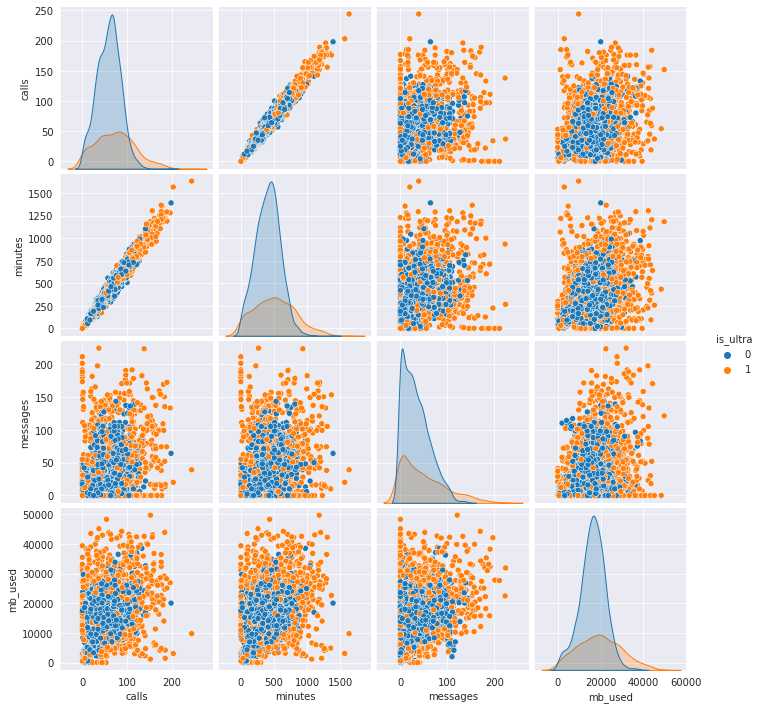

In [14]:
sns.pairplot(df, hue = 'is_ultra')

## Разбейте данные на выборки

In [8]:
df_train, df_valid = train_test_split(df, test_size=0.40, random_state=12345)
df_valid, df_test = train_test_split(df_valid,test_size = 0.5, random_state=12345)
print('Обучающей выборки:', df_train.shape[0],'объектов')
print('Валидационной выборки:', df_valid.shape[0],'объекта')
print('Тестовой выборки:',df_test.shape[0],'объекта')

Обучающей выборки: 1928 объектов
Валидационной выборки: 643 объекта
Тестовой выборки: 643 объекта


## Исследуйте модели

In [9]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

# Валидационная выборка
valid_features = df_valid.drop(['is_ultra'], axis=1)
valid_target = df_valid['is_ultra']

# Тренеровочная выборка
train_features = df_train.drop(['is_ultra'], axis=1)
train_target = df_train['is_ultra']

#Тестовая выборка
test_features = df_test.drop(['is_ultra'], axis=1)
test_target = df_test['is_ultra']

### Дерево решений

In [10]:
best_model_tree = None
best_result_tree = 0
best_depth = 0
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(train_features, train_target)
    predictions = model.predict(valid_features)
    result = accuracy_score(valid_target, predictions)
    if result > best_result_tree:
        best_model_tree = model
        best_result_tree = result
        best_depth = depth
        
print("Accuracy лучшей модели:", best_result_tree)
print("Depth лучшей модели:", best_depth)

Accuracy лучшей модели: 0.7853810264385692
Depth лучшей модели: 3


### Случайный лес

In [11]:
best_model_forest = None
best_result_forest = 0
count_tree = 0
best_depth = 0

time_start = time.perf_counter()

for estim in range(10,70,5):
    for depth in range(1,10):
        model = RandomForestClassifier(random_state=12345, n_estimators=estim, max_depth = depth)
        model.fit(train_features, train_target)
        predictions = model.predict(valid_features)
        result = accuracy_score(valid_target, predictions)
        if result > best_result_forest:
            best_model_forest = model
            best_result_forest = result
            count_tree = estim
            best_depth = depth
            
time_end = time.perf_counter()
total_time = time_end - time_start

print("Время затраченное на процесс:", total_time)
print("Accuracy лучшей модели:", best_result_forest)
print("Количество деревьев:", count_tree)
print("Лучшая глубина:", best_depth)

Время затраченное на процесс: 10.254989820998162
Accuracy лучшей модели: 0.8087091757387247
Количество деревьев: 40
Лучшая глубина: 8


### Логистическая регрессия

In [12]:
model = LogisticRegression(random_state=12345, solver='lbfgs') 
model.fit(train_features, train_target)
predictions = model.predict(valid_features)
result = accuracy_score(valid_target, predictions)
print(result)

0.7107309486780715


### Вывод 

Были использованны три модели
- Дерево решений
- случацный лес
- Логистическая регрессия 

Получены лучшие результаты для каждой модели 
- Дерево решений - accuracy = 0.7853810264385692, depth = 3
- случайный лес - accuracy = 0.8087091757387247, количество деревьев = 40, depth = 8
- логистическая регрессия = 0.7107309486780715

Из данных результатов видно, что на данном этапе выгоднее использовать "Случайный лес" с лучшими параметрами

## Проверьте модель на тестовой выборке

In [13]:
model = RandomForestClassifier(random_state=12345, n_estimators=40, max_depth=8)
model.fit(train_features, train_target)
predictions = model.predict(test_features)
result = accuracy_score(test_target, predictions)
print("Accuracy:", result)

Accuracy: 0.7962674961119751


### Вывод

Модель корректно проверена на тестовой выборке. Переобучения или недообучения не обнаружено. 
Лучшей моделью оказался "случайный лес" с количеством деревьев 40 и глубиной 8. Accuracy = 0.80